In [1]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
bank = pd.read_csv('bank-full.csv', delimiter=';')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Outcome variable

We'll start off by calculating the proportion of successful calls

In [3]:
# Proportion of yes/no

ycount = bank['y'].value_counts()
# we need to count the number of total observations
rowcount = bank.shape[0]-1

print('Proportion yes: ' + '{0:2.3f}'.format((ycount[1]/rowcount)))
print('Proportion no: ' + '{0:2.3f}'.format((ycount[0]/rowcount)))

# We'll save the overall proportion of successes as the variable expected, this will help us with our chi squared tests
expected = ycount[1]/rowcount

Proportion yes: 0.117
Proportion no: 0.883


### Age

We'll now look at the age feature, we'll start off by plotting the distribution, creating a box plot, and compare the box plots of the yes and no outcomes. We'll then use a t-test to test the null hypothesis that there is no difference in age between the successful and unsuccessful groups, the alternative hypothesis is that there is an age difference between the two groups

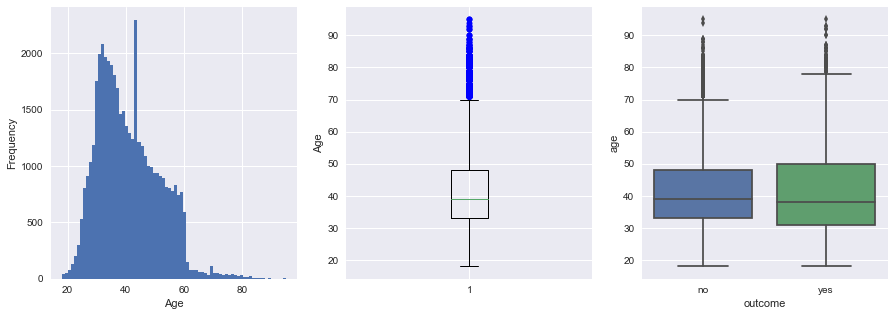

In [20]:
plt.subplot(1, 3, 1)
ageplt = bank.age.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Age')

plt.subplot(1, 3, 2)
agebox = plt.boxplot(bank.age, 0, 'b')
plt.ylabel('Age')

plt.subplot(1, 3, 3)
agebox2 = sns.boxplot(x="y", y="age", data=bank)
agebox2.set(xlabel='outcome')

In [23]:
# T test, we'll also conduct a t-test to see the statistical significance between the age of the customers who subscribed vs those who didn't

stats.ttest_ind(bank['age'][bank['y']=='yes'],bank['age'][bank['y']=='no'])

Ttest_indResult(statistic=5.3502554230362032, pvalue=8.825643691922395e-08)

Since we have such a small p value, we reject the null hypothesis in favour of the alternative hypothesis, i.e. there is a statistically significant age difference between the two groups

### Balance

We'll now look at the balance feature, once again we'll start off by plotting the distribution, creating a box plot, and compare the box plots of the yes and no outcomes. We'll then use a t-test to test the null hypothesis that there is no difference in account balance between the successful and unsuccessful groups, the alternative hypothesis is that there is  difference in account balance between the two groups.

Note that we are using log scaling in the y-axis of our final box plot so that it is easier for us to compare them

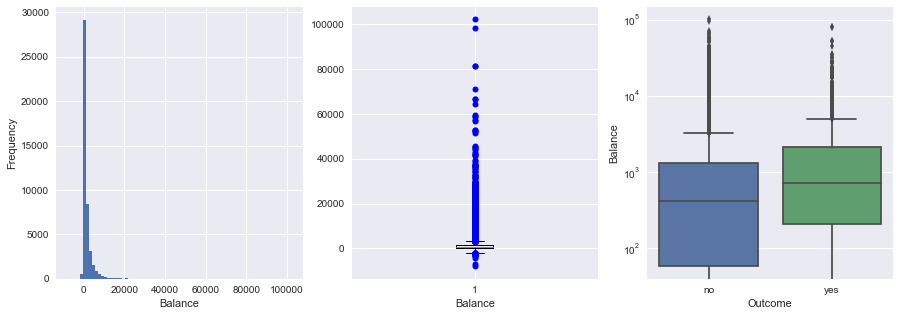

In [26]:
# Balance

plt.subplot(1, 3, 1)
balanceplt = bank.balance.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Balance')

plt.subplot(1, 3, 2)
balancebox = plt.boxplot(bank.balance, 0, 'b')
plt.xlabel('Balance')

plt.subplot(1, 3, 3)
balancebox2 = sns.boxplot(x="y", y="balance", data=bank)
balancebox2.set(xlabel='Outcome')
balancebox2.set(ylabel='Balance')
balancebox2.set_yscale('log')

In [19]:
stats.ttest_ind(bank['balance'][bank['y']=='yes'],bank['balance'][bank['y']=='no'])

Ttest_indResult(statistic=11.25043445878562, pvalue=2.5211136918751468e-29)

Since we have such a small p value, we reject the null hypothesis in favour of the alternative hypothesis, i.e. there is a statistically significant difference in account balance between the two groups

### Duration

Finally we look at the duration feature, once again we'll start off by plotting the distribution, creating a box plot, and compare the box plots of the yes and no outcomes. We'll then use a t-test to test the null hypothesis that there is no difference in final call length between the successful and unsuccessful groups, the alternative hypothesis is that there is difference in final call length between the two groups.

Note that we are using log scaling in the y-axis of our final box plot so that it is easier for us to compare them

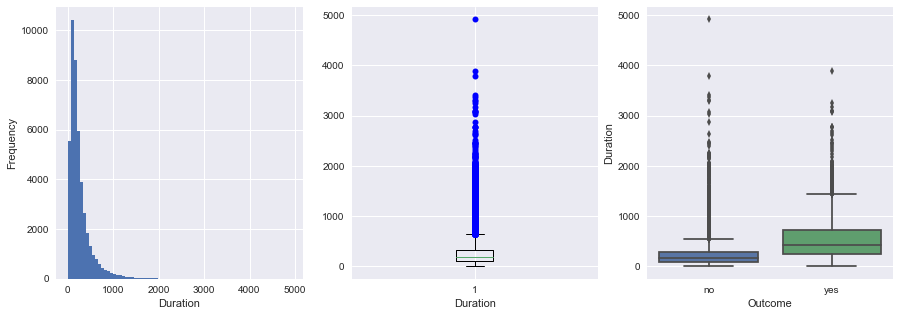

In [8]:
# Duration - last contact duration, in seconds

plt.subplot(1, 3, 1)
durationplt = bank.duration.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Duration')

plt.subplot(1, 3, 2)
durationbox = plt.boxplot(bank.duration, 0, 'b')
plt.xlabel('Duration')

plt.subplot(1, 3, 3)
durationbox2 = sns.boxplot(x="y", y="duration", data=bank)
durationbox2.set(xlabel='Outcome')
durationbox2.set(ylabel='Duration')

In [10]:
stats.ttest_ind(bank['duration'][bank['y']=='yes'],bank['duration'][bank['y']=='no'])

Ttest_indResult(statistic=91.289436126708623, pvalue=0.0)

From the results of out T-test we reject the null hypothesis, and accept the alternative hypothesis